In [2]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
os.environ['HUGGINGFACE_API_KEY'] = os.getenv('HUGGINGFACE_API_KEY')

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
model = ChatGroq(model_name="llama-3.3-70b-versatile")

e:\projects\agentic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
len(embeddings.embed_query("Hello World!"))

384

In [6]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [8]:
loader = DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)

In [9]:
docs = loader.load()

In [10]:
docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content="ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP â€“ Size, Composition, and Global Share\nAs of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China

In [11]:
docs[0].page_content

"ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP â€“ Size, Composition, and Global Share\nAs of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the high

In [12]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=50)

In [14]:
new_docs = text_splitter.split_documents(docs)

In [18]:
doc_string = [doc.page_content for doc in new_docs]

In [19]:
doc_string

['ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy',
 'The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,',
 'It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a',
 'a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.',
 'innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP â€“ Size, Composition, and Global Share',
 'As of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for appr

In [20]:
len(doc_string)

56

In [21]:
db = Chroma.from_documents(new_docs, embeddings)

In [22]:
retriever = db.as_retriever(search_kwargs={"k":3})

In [23]:
retriever.invoke("industrial growth of usa?")

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='GDP Growth Trends and Dynamics'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The U.S. maintains its GDP growth through strong innovation, entrepreneurship, and investment in R&D. With companies like Apple, Google, Amazon, Microsoft, and Tesla leading global markets, the U.S.')]

# creation of pydantic class

In [32]:
from pydantic import BaseModel, Field

class TopicSelectionParser(BaseModel):
    topic: str = Field(description="The topic of the conversation")
    reasoning: str = Field(description="The reasoning behind the topic selection")

In [33]:
from langchain_core.output_parsers import PydanticOutputParser


In [34]:
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [35]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"topic": {"description": "The topic of the conversation", "title": "Topic", "type": "string"}, "reasoning": {"description": "The reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["topic", "reasoning"]}\n```'

In [55]:
import operator
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [40]:
AgentState = {}

In [41]:
AgentState['messages'] = []

In [42]:
AgentState

{'messages': []}

In [43]:
AgentState['messages'].append("Hi, how are you?")

In [45]:
AgentState

{'messages': ['Hi, how are you?']}

In [46]:
AgentState['messages'].append("I am fine, thanks!")


In [47]:
AgentState

{'messages': ['Hi, how are you?', 'I am fine, thanks!']}

In [48]:
AgentState['messages'].append("You are a helpful assistant.")

In [49]:
AgentState

{'messages': ['Hi, how are you?',
  'I am fine, thanks!',
  'You are a helpful assistant.']}

In [ ]:
AgentState["messages"][0 ]

'Hi, how are you?'

In [90]:
def function1(state: AgentState):
    pass

In [91]:
def function2(state: AgentState):
    pass

In [92]:
def function3(state: AgentState):
    pass

In [93]:
def router(state: AgentState):
    pass

In [94]:
from langgraph.graph import StateGraph, END

In [95]:
workflow = StateGraph(AgentState)

In [96]:
workflow.add_node("supervisor", function1)

In [97]:
workflow.add_node("RAG", function2)

In [98]:
workflow.add_node("LLM", function3)

In [99]:
workflow.set_entry_point("supervisor")

In [100]:
workflow.add_conditional_edges(
    "supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
    )  

In [101]:
workflow.add_edge("RAG", END)
workflow.add_edge("LLM", END)

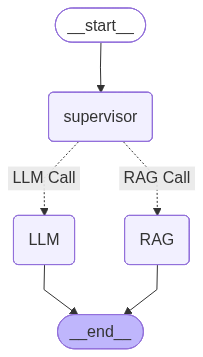

In [102]:
workflow.compile()